
b726
{'main': '/home/alex/Documents/gtc-notebook', 'data': '/home/alex/Documents/gtc-notebook/data/labquakes/'}
{'t0': 9450.0, 'tend': 9650.0, 'Nheaders': 2, 'dir_data': 'data/labquakes/', 'case_study': 'MeleVeeduetal2020/b726', 'data_type': 'lab', 'struct_type': 'MeleVeeduetal2020', 'file_format': 'txt', 'downsample_factor': 1, 'vl': 10, 'segment': None, 'obs_unit': 'MPa', 'time_unit': 's', 'obs_label': '$\\tau_f$ [MPa]', 'time_label': '$\\tau_f$ [s]'}
done


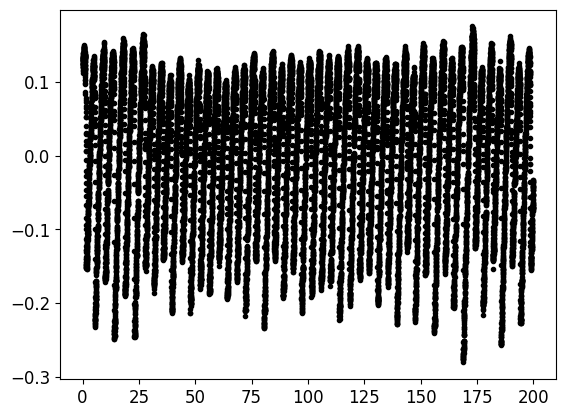

In [17]:
# %matplotlib ipympl

import os
import matplotlib.pyplot as plt
import time
import numpy as np
from utils.load import load_data
from utils.load import add_noise
from utils.params import set_param

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fontsize = 12
plt.rcParams.update({'font.size': fontsize})

np.random.seed(42)

tic_begin = time.time()

dirs = {'main' : os.getcwd()}


##%% Set case study
plt.close('all')

exp = 'b726'
#exp = 'b698'
#exp = 'i417'
#exp = 'p4679'
#exp = 'p4581'
#exp = 'cascadia'
#exp = 'sim_b726'
#exp = 'sim_b698'
#exp = 'sim_i417'

params = set_param(exp)

dirs['data'] = dirs['main'] + '/' + params['dir_data']

#% Load data
print('')
# print('Loading data: ', end='')
print(exp)
print(dirs)
print(params)
X, Y, t, dt, vl = load_data(exp, dirs, params)
print('done')

Anoise = 0.0
X = add_noise(X, Anoise, rand_seed=42)

plt.figure()
plt.plot(t, X, '.k')

b726
{'main': '/home/alex/Documents/gtc-notebook', 'data': '/home/alex/Documents/gtc-notebook/data/labquakes/'}
{'t0': 9450.0, 'tend': 9650.0, 'Nheaders': 2, 'dir_data': 'data/labquakes/', 'case_study': 'MeleVeeduetal2020/b726', 'data_type': 'lab', 'struct_type': 'MeleVeeduetal2020', 'file_format': 'txt', 'downsample_factor': 1, 'vl': 10, 'segment': None, 'obs_unit': 'MPa', 'time_unit': 's', 'obs_label': '$\\tau_f$ [MPa]', 'time_label': '$\\tau_f$ [s]'}


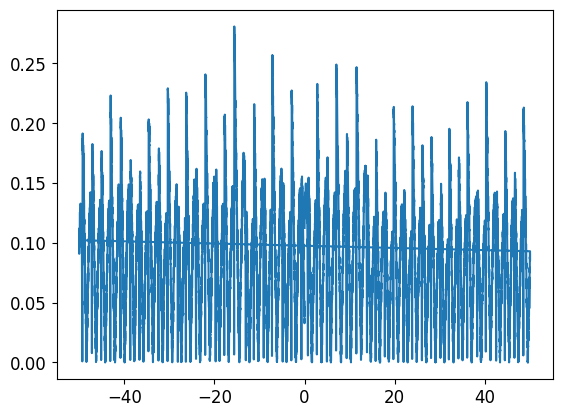

In [19]:
import os
import matplotlib.pyplot as plt
from utils.load import load_data
from utils.params import set_param

dirs = {'main' : os.getcwd()}

exp = 'b726'
# exp = 'b698'
# exp = 'i417'
#exp = 'p4679'
#exp = 'p4581'
# exp = 'cascadia'
#exp = 'sim_b726'
#exp = 'sim_b698'
#exp = 'sim_i417'

params = set_param(exp)

dirs['data'] = dirs['main'] + '/' + params['dir_data']

#% Load data
print(exp)
print(dirs)
print(params)
X, Y, t, dt, vl = load_data(exp, dirs, params)

# FFT of X to get the dominant frequency
import scipy.fftpack
Xf = scipy.fftpack.fft(X)
freq = scipy.fftpack.fftfreq(len(X), dt)
plt.figure()
plt.plot(freq, np.abs(Xf))

# what are X, Y, t, dt, vl?
# X is the shear stress (Pa)?
# Y is the slip rate (m/s)?
# t is the time (s)?
# dt is the time step (s)?
# vl is the velocity (m/s)?

# print(Y)

# Laurenti paper + Kagle competirion prediction shear stress from acustiv signal (variance)
# or are they just trying to prdict the sjear signal forward in time?

# 
# 
# plt.subplot(2,1,1)
# plt.plot(t, X)
# plt.ylabel('Shear stress (Pa)')
# plt.subplot(2,1,2)
# plt.plot(t, Y)
# plt.ylabel('Slip rate (m/s)')